# <center>Age and Gender Prediction</center>

Using this dataset, I will be attempting to create a model capable of predicting the gender of an individual

### 1. Imports

In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import cv2
import os

import tensorflow as tf

from keras.models import Sequential, load_model, Model
from keras.layers import Conv2D, MaxPooling2D, AvgPool2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Flatten, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from keras.layers import Input, Activation, Add
from keras.regularizers  import l2
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

from PIL import Image

### 2. Loading Data

UtK Face Dataset images have labels embedded in their file name as `[agr]_[gender]_[race]_[time].jpg`

In [3]:
path = 'UTKFace_origin/'

In [4]:
pixels = []
agr = []
gender = []

For better performance will convert the images to grayscale.

In [5]:
i = 0
for img in os.listdir(path):
    i = i + 1
#     print(img)
    genders = img.split("_")[1]
#     print(genders)
    img = cv2.imread(str(path)+"/"+str(img))
#     print(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100,100))
#     print(img)
    pixels.append(np.array(img))
    gender.append(np.array(genders))
#     break
    

In [6]:
pixels

[array([[206, 197, 198, ...,  96,  95,  96],
        [199, 194, 197, ...,  96,  97,  99],
        [191, 200, 188, ...,  98,  98,  99],
        ...,
        [237, 237, 235, ...,  96,  95,  96],
        [237, 237, 235, ...,  96,  95,  96],
        [236, 232, 230, ...,  96,  95,  96]], dtype=uint8),
 array([[124, 127, 126, ..., 156, 157, 158],
        [125, 125, 127, ..., 157, 157, 158],
        [126, 125, 128, ..., 159, 157, 158],
        ...,
        [172, 170, 164, ..., 146, 146, 145],
        [174, 170, 165, ..., 145, 145, 144],
        [173, 169, 165, ..., 145, 145, 144]], dtype=uint8),
 array([[232, 233, 234, ..., 213, 226, 226],
        [236, 232, 210, ..., 168, 225, 227],
        [232, 232, 160, ..., 119, 224, 228],
        ...,
        [ 43,  49,  64, ...,  14,  20,  24],
        [ 48,  64,  74, ...,  75,  90,  97],
        [ 43,  40,  48, ..., 253, 254, 255]], dtype=uint8),
 array([[ 82,  82,  82, ..., 180, 161, 149],
        [ 82,  82,  82, ..., 179, 166, 160],
        [ 82,  8

In [7]:
gender

[array('0', dtype='<U1'),
 array('0', dtype='<U1'),
 array('1', dtype='<U1'),
 array('1', dtype='<U1'),
 array('1', dtype='<U1'),
 array('1', dtype='<U1'),
 array('1', dtype='<U1'),
 array('1', dtype='<U1'),
 array('1', dtype='<U1'),
 array('1', dtype='<U1'),
 array('1', dtype='<U1'),
 array('0', dtype='<U1'),
 array('1', dtype='<U1'),
 array('0', dtype='<U1'),
 array('0', dtype='<U1'),
 array('1', dtype='<U1'),
 array('1', dtype='<U1'),
 array('1', dtype='<U1'),
 array('1', dtype='<U1'),
 array('0', dtype='<U1'),
 array('0', dtype='<U1'),
 array('0', dtype='<U1'),
 array('0', dtype='<U1'),
 array('0', dtype='<U1'),
 array('0', dtype='<U1'),
 array('0', dtype='<U1'),
 array('0', dtype='<U1'),
 array('0', dtype='<U1'),
 array('0', dtype='<U1'),
 array('0', dtype='<U1'),
 array('0', dtype='<U1'),
 array('0', dtype='<U1'),
 array('0', dtype='<U1'),
 array('0', dtype='<U1'),
 array('0', dtype='<U1'),
 array('0', dtype='<U1'),
 array('0', dtype='<U1'),
 array('0', dtype='<U1'),
 array('0', 

In [8]:
pixels = np.array(pixels)
gender = np.array(gender, np.uint64)

In [9]:
pixels

array([[[206, 197, 198, ...,  96,  95,  96],
        [199, 194, 197, ...,  96,  97,  99],
        [191, 200, 188, ...,  98,  98,  99],
        ...,
        [237, 237, 235, ...,  96,  95,  96],
        [237, 237, 235, ...,  96,  95,  96],
        [236, 232, 230, ...,  96,  95,  96]],

       [[124, 127, 126, ..., 156, 157, 158],
        [125, 125, 127, ..., 157, 157, 158],
        [126, 125, 128, ..., 159, 157, 158],
        ...,
        [172, 170, 164, ..., 146, 146, 145],
        [174, 170, 165, ..., 145, 145, 144],
        [173, 169, 165, ..., 145, 145, 144]],

       [[232, 233, 234, ..., 213, 226, 226],
        [236, 232, 210, ..., 168, 225, 227],
        [232, 232, 160, ..., 119, 224, 228],
        ...,
        [ 43,  49,  64, ...,  14,  20,  24],
        [ 48,  64,  74, ...,  75,  90,  97],
        [ 43,  40,  48, ..., 253, 254, 255]],

       ...,

       [[212, 205, 205, ..., 223, 223, 223],
        [211, 210, 206, ..., 220, 221, 221],
        [209, 204, 213, ..., 220, 222, 222

In [10]:
gender

array([0, 0, 1, ..., 1, 1, 1], dtype=uint64)

In [11]:
len(pixels), len(gender)

(23708, 23708)

### 3. Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(pixels, gender, random_state = 99)

len(X_train), len(X_test), len(y_train), len(y_test) 

(17781, 5927, 17781, 5927)

### 4. Creating the Model

In [13]:
input = Input(shape = (100, 100, 1))

# print(input)

conv1 = Conv2D(32, (3,3), padding = 'same', strides = (1, 1), kernel_regularizer = l2(0.001))(input)
conv1 = Dropout(0.1)(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size = (2,2))(conv1)

conv2 = Conv2D(64, (3,3), padding = 'same', strides = (1, 1), kernel_regularizer = l2(0.001))(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size = (2,2))(conv2)

conv3 = Conv2D(128, (3,3), padding = 'same', strides = (1, 1), kernel_regularizer = l2(0.001))(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Activation('relu')(conv3)
pool3 = MaxPooling2D(pool_size = (2,2))(conv3)

conv4 = Conv2D(256, (3,3), padding = 'same', strides = (1, 1), kernel_regularizer = l2(0.001))(pool3)
conv4 = Dropout(0.1)(conv4)
conv4 = Activation('relu')(conv4)
pool4 = MaxPooling2D(pool_size = (2,2))(conv4)

flatten = Flatten()(pool4)

dense1 = Dense(128, activation = 'relu')(flatten)
drop1 = Dropout(0.2)(dense1)
output = Dense(2, activation = 'sigmoid')(drop1)

In [14]:
model = Model(inputs = input, outputs = output)
model.compile(optimizer = 'adam', loss = ["sparse_categorical_crossentropy"], metrics = ['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 activation (Activation)     (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                             

In [15]:
model_path = 'gender_detection_model.h5'
checkpointer = ModelCheckpoint(model_path, monitor = 'loss', verbose = 1, save_best_only = True, save_weights_only = False, mode = 'auto', save_freq = 'epoch')

callback_list = [checkpointer]

### 5. Training the Model

In [16]:
save = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 30, callbacks = [callback_list])

Epoch 1/30
556/556 [==============================] - ETA: 0s - loss: 0.8245 - accuracy: 0.7917
Epoch 1: loss improved from inf to 0.82449, saving model to gender_detection_model.h5
556/556 [==============================] - 172s 307ms/step - loss: 0.8245 - accuracy: 0.7917 - val_loss: 0.4881 - val_accuracy: 0.8581
Epoch 2/30
556/556 [==============================] - ETA: 0s - loss: 0.4686 - accuracy: 0.8568
Epoch 2: loss improved from 0.82449 to 0.46863, saving model to gender_detection_model.h5
556/556 [==============================] - 159s 287ms/step - loss: 0.4686 - accuracy: 0.8568 - val_loss: 0.4530 - val_accuracy: 0.8642
Epoch 3/30
556/556 [==============================] - ETA: 0s - loss: 0.4127 - accuracy: 0.8687
Epoch 3: loss improved from 0.46863 to 0.41270, saving model to gender_detection_model.h5
556/556 [==============================] - 167s 300ms/step - loss: 0.4127 - accuracy: 0.8687 - val_loss: 0.4147 - val_accuracy: 0.8726
Epoch 4/30
556/556 [=====================

In [17]:
# Check teh train and test loss and accuracy
train_loss = save.history['loss']
test_loss = save.history['val_loss']

train_accuracy = save.history['accuracy']
test_accuracy = save.history['val_accuracy']

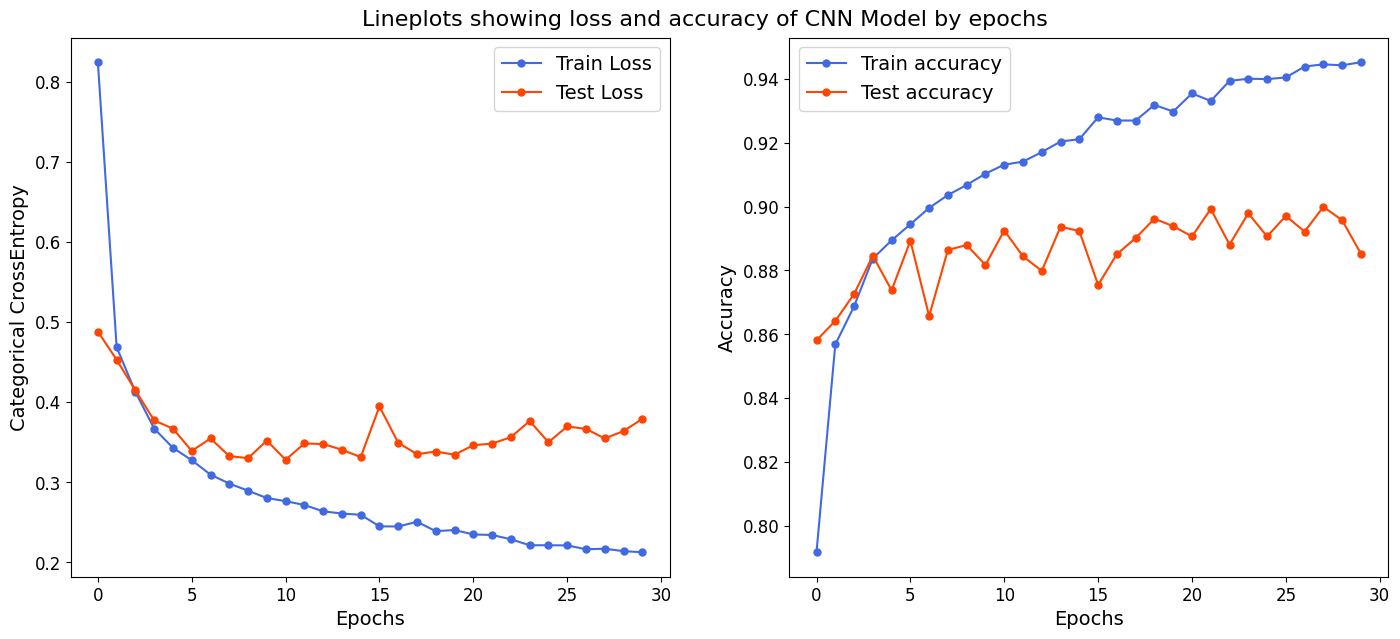

In [18]:
fig, ax = plt.subplots(ncols = 2, figsize = (17,7))
ax = ax.ravel()

ax[0].plot(train_loss, label = 'Train Loss', color = 'royalblue', marker = 'o', markersize = 5)
ax[0].plot(test_loss, label = 'Test Loss', color = 'orangered', marker = 'o', markersize = 5)

ax[0].set_xlabel('Epochs', fontsize = 14)
ax[0].set_ylabel('Categorical CrossEntropy', fontsize = 14)

ax[0].legend(fontsize = 14)
ax[0].tick_params(axis = 'both', labelsize = 12)

ax[1].plot(train_accuracy, label = 'Train accuracy', color = 'royalblue', marker = 'o', markersize = 5)
ax[1].plot(test_accuracy, label = 'Test accuracy', color = 'orangered', marker = 'o', markersize = 5)

ax[1].set_xlabel('Epochs', fontsize = 14)
ax[1].set_ylabel('Accuracy', fontsize = 14)

ax[1].legend(fontsize = 14)
ax[1].tick_params(axis = 'both', labelsize = 12)

fig.suptitle(x = 0.5, y = 0.92, t = "Lineplots showing loss and accuracy of CNN Model by epochs ", fontsize = 16)
plt.show()

### 6. Evaluating the Model

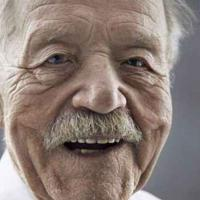

In [21]:
# new_test_img = '/kaggle/input/utkface-new/UTKFace/100_1_0_20170110183726390.jpg.chip.jpg'
new_test_img = 'UTKFace_origin/100_0_0_20170112213500903.jpg.chip.jpg'
Image.open(new_test_img) 

In [23]:
new_test_gender = []
new_test_pixels = []

new_test_genders = new_test_img.split("_")[2]
print(new_test_genders)

img = cv2.imread(str(new_test_img))
# print(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (100,100))
# print(img)
new_test_pixels.append(np.array(img))
new_test_gender.append(np.array(new_test_genders))

new_test_pixels = np.array(new_test_pixels)
new_test_genders = np.array(new_test_genders, np.uint64)


0


In [31]:
len(new_test_pixels), len(new_test_gender)
new_test_pixels

array([[[206, 197, 198, ...,  96,  95,  96],
        [199, 194, 197, ...,  96,  97,  99],
        [191, 200, 188, ...,  98,  98,  99],
        ...,
        [237, 237, 235, ...,  96,  95,  96],
        [237, 237, 235, ...,  96,  95,  96],
        [236, 232, 230, ...,  96,  95,  96]]], dtype=uint8)

specify verbose=0 to see no output during the evaluation process.

In [25]:
prediction = model.predict(new_test_pixels, verbose=0)
print(prediction)

[[0.91124874 0.6665514 ]]


specify verbose=1 to see output during the evaluation process.

In [26]:
prediction = model.predict(new_test_pixels, verbose=1)
print(prediction)

1/1 [==============================] - 0s 19ms/step
[[0.91124874 0.6665514 ]]


In [27]:
result = np.argmax(prediction)
if result == 1:
    print("FeMale")
elif result == 0:
    print("Male")
else:
    print("Unkown")

Male


In [41]:
y_pred = model.predict(X_test)
y_pred_labels = []
for pred in y_pred:
    y_pred_labels.append(np.argmax(pred))

cm = confusion_matrix(y_test, y_pred_labels)
cm

186/186 [==============================] - 8s 45ms/step


array([[2719,  391],
       [ 289, 2528]], dtype=int64)

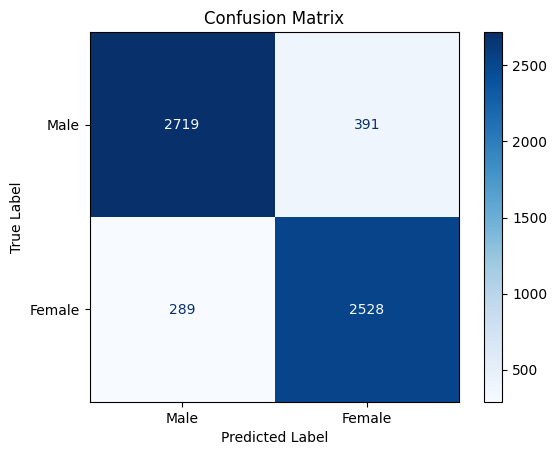

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Define class labels
classes = ['Male', 'Female']

# Create the confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Configure and show the visualization
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [46]:
tp = cm[0, 0]  # male true positives
fn = cm[0, 1]  # male false negatives
fp = cm[1, 0]  # male false positives
tn = cm[1, 1]  # male true negative

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precisión:", precision)
print("Recobrado:", recall)
print("Puntuación F1:", f1_score)

Precisión: 0.9039228723404256
Recobrado: 0.8742765273311897
Puntuación F1: 0.8888525661981039


### Metrics: 
Only the statistical metrics TPR and FPR are employed among the justice metrics.

$$ TPR(True Positive Rate) = \frac{TP}{TP + FN} $$
$$ FNR(False Positive Rate) = \frac{FP}{FP + TN}$$

In [47]:
# Calculate TPR and FNR for males
tpr_male = tp / (tp + fn)
fnr_male = fn / (tp + fn)

# Calculate TPR and FNR for females
tpr_female = tn / (tn + fp)
fnr_female = fp / (tn + fp)

print("Clase 0")
print("TPR:", tpr_male)
print("FNR:", fnr_male)
print()
print("Clase 1")
print("TPR:", tpr_female)
print("FNR:", fnr_female)

Clase 0
TPR: 0.8742765273311897
FNR: 0.1257234726688103

Clase 1
TPR: 0.8974085906993255
FNR: 0.10259140930067448


We now evaluate if the odds are even. For this, the difference between the TPR of the female and male gender should not exceed 0.05.

In [49]:
if abs(tpr_male - tpr_female) < 0.05:
    print('Equalized odds', abs(tpr_male - tpr_female))
else:
    print('Not equalized odds')
    print(abs(tpr_male - tpr_female))

Equalized odds 0.02313206336813589


In the same way we evaluate using FPR.

In [50]:
if abs(fnr_male - fnr_female) < 0.05:
    print('Equalized odds', abs(fnr_male - fnr_female))
else:
    print('Not equalized odds')
    print(abs(fnr_male - fnr_female))

Equalized odds 0.023132063368135808
